In [263]:
import pandas as pd
import matplotlib.pyplot as plt

### Convert the text file to csv file with cols : "sentence_idx", "word","tag"

In [213]:
def text_to_csv(text_dir,csv_dir):
    with open(text_dir, 'r') as file:
        lines = file.readlines()


    tags = []
    words = []
    sentence_idx = []
    sentence_counter = 1

    for line in lines:

        line = line.strip()
        if line:
            tokens = line.split()
            word = tokens[0]
            tag = tokens[4]
            tags.append(tag)
            words.append(word)
            sentence_idx.append(sentence_counter)
        else:
            sentence_counter += 1

    data = {"sentence_idx":sentence_idx,"word":words,"tag":tags}
    data_frame =pd.DataFrame(data)
    data_frame.to_csv(csv_dir, index=False)

### Combine 3 dataset , upgrade the sentence numbers base on the merge

In [214]:
def combine_three_data(a, b,c):

    # updating sentence number before merging to avoid conflict
    a_last_sent = a["sentence_idx"][len(a['sentence_idx'])-1]
    b["sentence_idx"] = b["sentence_idx"] + a_last_sent
    b_last_sent = b["sentence_idx"][len(test_data['sentence_idx'])-1]
    c["sentence_idx"] = c["sentence_idx"] + b_last_sent

    result = pd.concat([a, b,c], ignore_index=True)

    return result


In [215]:
train_data = text_to_csv("/home/jovyan/work/data/health/train_out.txt","/home/jovyan/work/data/health/train_data.csv")
test_data = text_to_csv("/home/jovyan/work/data/health/test_out.txt","/home/jovyan/work/data/health/test_data.csv")
valid_data = text_to_csv("/home/jovyan/work/data/health/valid_out.txt","/home/jovyan/work/data/health/valid_data.csv")

FileNotFoundError: [Errno 2] No such file or directory: '/home/jovyan/work/data/health/train_out.txt'

In [216]:
train_data = pd.read_csv("/home/jovyan/work/data/health/pre/train_data.csv")
test_data = pd.read_csv("/home/jovyan/work/data/health/pre/test_data.csv")
valid_data = pd.read_csv("/home/jovyan/work/data/health/pre/valid_data.csv")

# combine_data = combine_three_data(train_data,test_data,valid_data)
# combine_data.to_csv("/home/jovyan/work/data/health/full_i2b2_data.csv", index=False)


### Relabel tags to have customize tags relates GDPR and remove unrelated tag form data

In [197]:
full_data = pd.read_csv("/home/jovyan/work/data/health/full_i2b2_data.csv")
tags = full_data["tag"].unique()
print(tags)

['O' 'B-DATE' 'I-DATE' 'B-AGE' 'B-DOCTOR' 'B-HOSPITAL' 'I-DOCTOR'
 'B-ORGANIZATION' 'B-PROFESSION' 'B-IDNUM' 'I-IDNUM' 'I-PROFESSION'
 'I-HOSPITAL' 'B-PATIENT' 'I-PATIENT' 'B-MEDICALRECORD' 'B-PHONE'
 'B-STREET' 'I-STREET' 'B-CITY' 'I-CITY' 'B-STATE' 'B-ZIP' 'I-PHONE'
 'B-FAX' 'I-FAX' 'I-ORGANIZATION' 'I-MEDICALRECORD' 'B-COUNTRY'
 'B-USERNAME' 'I-AGE' 'B-DEVICE' 'I-COUNTRY' 'B-BIOID' 'I-ZIP'
 'B-LOCATION_OTHER' 'I-LOCATION_OTHER' 'B-EMAIL' 'B-HEALTHPLAN'
 'I-HEALTHPLAN' 'B-URL' 'I-URL' 'I-DEVICE' 'I-STATE']


In [217]:
def relabel_tag(data):

    tag_replacement_dict = {
        'B-AGE': 'B-AGE',
        'B-BIOID': 'O',
        'B-CITY': 'CITY',
        'B-COUNTRY': 'COUNTRY',
        'B-DATE': 'DATE',
        'B-DEVICE': 'O',
        'I-DEVICE': 'O',
        'B-EMAIL': 'EMAIL',
        'B-FAX': 'FAX',
        'B-HEALTHPLAN': 'O',
        'I-HEALTHPLAN':'O',
        'B-HOSPITAL': 'B-HOSPITAL',
        'B-IDNUM': 'IDNUM',
        'B-LOCATION_OTHER': 'O',
        'B-MEDICALRECORD': 'B-MEDICALRECORD',
        'B-ORGANIZATION': 'B-ORGANIZATION',
        'B-PATIENT': 'B-PER',
        'B-PHONE': 'PHONE',
        'B-PROFESSION': 'B-PROFESSION',
        'B-STREET': 'B-STREET',
        'B-STATE': 'B-STATE',
        'I-STATE': 'I-STATE',
        'B-URL': 'O',
        'B-USERNAME': 'USERNAME',
        'B-ZIP': 'ZIP',
        'I-AGE': 'I-AGE',
        'I-CITY': 'CITY',
        'I-COUNTRY': 'COUNTRY',
        'I-DATE': 'DATE',
        'I-DOCTOR': 'I-PER',
        'B-DOCTOR': 'B-PER',
        'I-FAX': 'FAX',
        'I-HOSPITAL': 'I-HOSPITAL',
        'I-IDNUM': 'IDNUM',
        'I-LOCATION_OTHER': 'O',
        'I-MEDICALRECORD': 'I-MEDICALRECORD',
        'I-ORGANIZATION': 'I-ORGANIZATION',
        'I-PATIENT': 'I-PER',
        'I-PHONE': 'PHONE',
        'I-PROFESSION': 'I-PROFESSION',
        'I-STREET': 'I-STREET',
        'I-URL': 'O',
        'I-USERNAME': 'USERNAME',
        'I-ZIP': 'ZIP',
        'O': 'O'
    }


    data['tag'] = data['tag'].replace(tag_replacement_dict)
    print(data.shape)
    return data

In [218]:
train_data = relabel_tag(train_data)
test_data = relabel_tag(test_data)
valid_data = relabel_tag(valid_data)

(444572, 3)
(415216, 3)
(199181, 3)


In [219]:
train_data.to_csv("/home/jovyan/work/data/health/train_data.csv", index=False)
test_data.to_csv("/home/jovyan/work/data/health/test_data.csv", index=False)
valid_data.to_csv("/home/jovyan/work/data/health/valid_data.csv", index=False)

In [200]:
relabel_data = relabel_tag(full_data)
relabel_data.head()

(1058969, 3)


,sentence_idx,word,tag
0,1,Record,O
1,1,date,O
2,1,:,O
3,1,2067,DATE
4,1,-,DATE


In [202]:
relabel_data.to_csv("/home/jovyan/work/data/health/relabel_full_i2b2_data.csv", index=False)

### Cleaning data

In [305]:
relabel_data = pd.read_csv("/home/jovyan/work/data/health/pre/relabel_full_i2b2_data.csv")

In [306]:
tag_valid = ['DATE', 'B-PER', 'I-PER', 'B-HOSPITAL', 'B-AGE', 'I-HOSPITAL', 'I-MEDICALRECORD', 'PHONE', 'B-MEDICALRECORD', 'IDNUM', 'CITY', 'I-STREET', 'B-PROFESSION', 'B-ORGANIZATION', 'I-ORGANIZATION', 'I-AGE', 'FAX', 'EMAIL']


In [315]:
import pandas as pd

def filter_dataset(dataset, tag_valid, max_sentence_length):
    # Create an empty DataFrame to store the filtered data
    filtered_data = pd.DataFrame(columns=dataset.columns)

    # Group the dataset by sentence_idx
    grouped = dataset.groupby('sentence_idx')

    # Iterate over each group
    for _, group in grouped:
        # Check if the group contains any valid tags and the sentence length is greater than min_sentence_length
        if any(tag in group['tag'].values for tag in tag_valid) and len(group) < max_sentence_length:
            # Append the group to the filtered data
            filtered_data = pd.concat([filtered_data, group], ignore_index=True)

    return filtered_data



In [316]:
filtered_dataset = filter_dataset(relabel_data, tag_valid,100)

In [313]:
filtered_dataset.shape

(378333, 3)

In [323]:
filtered_dataset.to_csv("/home/jovyan/work/data/health/filtered_full_relabel_i2b2.csv", index=False)

In [318]:
filtered_dataset.shape

(315389, 3)

In [317]:
# Assuming your dataset is stored in a DataFrame called 'df'
tag_counts = filtered_dataset['tag'].value_counts()

# Display the count for each unique tag
for tag, count in tag_counts.items():
    print(tag, count)

O 269319
DATE 18944
B-PER 6690
I-PER 5736
B-HOSPITAL 2123
I-HOSPITAL 1882
B-AGE 1843
I-MEDICALRECORD 1497
PHONE 1274
B-MEDICALRECORD 982
IDNUM 891
CITY 805
I-STREET 683
B-STATE 439
B-PROFESSION 393
B-STREET 361
ZIP 359
I-PROFESSION 341
USERNAME 226
B-ORGANIZATION 200
I-ORGANIZATION 186
COUNTRY 104
I-AGE 55
FAX 39
I-STATE 12
EMAIL 5


In [301]:
def get_max_len(sentences):
    return max([len(s) for s in sentences])

In [302]:
def get_sentences(dataset):
    n_sent = 1
    # print(dataset[0])
    grouped = dataset.groupby("sentence_idx").apply(lambda s: [(w, t) for w, t in zip(s["word"].values.tolist(),
                                                                                      s["tag"].values.tolist())])
    sentences = [s for s in grouped]

    def get_next():
        nonlocal n_sent
        try:
            s = grouped["Sentence: {}".format(n_sent)]
            n_sent += 1
            return s
        except:
            return None

    return sentences, get_next

In [303]:
def count_sentences_with_length(sentences, threshold):
    count = 0
    for s in sentences:
        if len(s) > threshold:
            count += 1
    return count

In [319]:
sentences, get_next = get_sentences(filtered_dataset)

In [320]:
def filter_dataset(dataset, tag_valid):
    # Create an empty DataFrame to store the filtered data
    filtered_data = pd.DataFrame(columns=dataset.columns)

    # Group the dataset by sentence_idx
    grouped = dataset.groupby('sentence_idx')

    # Iterate over each group
    for _, group in grouped:
        # Check if the group contains any valid tags
        if any(tag in group['tag'].values for tag in tag_valid):
            # Append the group to the filtered data
            filtered_data = pd.concat([filtered_data, group], ignore_index=True)

    return filtered_data

In [298]:
def extract_tags(sentences,threshold):
    sentences:[]
    count_none_tag = 0
    count_tag = 0
    for s in sentences:
        if len(s) > threshold:
            for w,t in s :
                if t == "EMAIL":
                    count_tag += 1
                    print(w)
                else:
                    count_none_tag += 1
    print("# none O tags in the threshold : ",threshold, count_tag)
    print("# O tags in the threshold : ",threshold, count_none_tag)

In [299]:
extract_tags(sentences,0)

yfcooley@wsh.org
yfcooley@wsh.org
gmichael@KCM.ORG
iparedes@oachosp.org
vmeadows@sbhnc.org
# none O tags in the threshold :  0 5
# O tags in the threshold :  0 1058964


In [ ]:
def filter_dataset(dataset, tag_valid):
    # Create an empty DataFrame to store the filtered data
    filtered_data = pd.DataFrame(columns=dataset.columns)

    # Group the dataset by sentence_idx
    grouped = dataset.groupby('sentence_idx')

    # Iterate over each group
    for _, group in grouped:
        # Check if the group contains any valid tags
        if any(tag in group['tag'].values for tag in tag_valid):
            # Append the group to the filtered data
            filtered_data = pd.concat([filtered_data, group], ignore_index=True)

    return filtered_data

In [321]:
maxlen = get_max_len(sentences)
print ('Maximum sequence length:', maxlen)
print(count_sentences_with_length(sentences,50))

Maximum sequence length: 99
1570


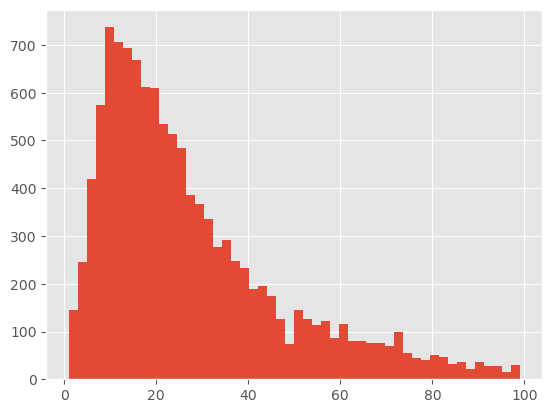

In [324]:
plt.style.use("ggplot")
plt.hist([len(s) for s in sentences], bins=50)
plt.show()

### Divide data to train and test
Please use splitData file in the root of project to split the data

In [203]:
train_final = pd.read_csv("/home/jovyan/work/data/health/i2b2_train_data.csv")
test_final = pd.read_csv("/home/jovyan/work/data/health/i2b2_test_data.csv")

In [220]:
print("train data size: ", train_data.shape)
print("test data size: ", test_data.shape)

train data size:  (444572, 3)
test data size:  (415216, 3)


In [208]:
print("train data size: ", train_final.shape)
print("test data size: ", test_final.shape)
print("train number of the sentence: ", train_final['sentence_idx'].iloc[-1])
print("test number of the sentence: ", test_final['sentence_idx'].iloc[-1])

train data size:  (687275, 3)
test data size:  (371694, 3)
train number of the sentence:  56428
test number of the sentence:  40046


In [210]:
tag_count = train_final["tag"].value_counts()
print(tag_count)

tag
O                  654914
DATE                13477
B-PER                4550
I-PER                4007
B-HOSPITAL           1470
B-AGE                1316
I-HOSPITAL           1248
I-MEDICALRECORD      1000
PHONE                 908
B-MEDICALRECORD       689
IDNUM                 639
CITY                  551
I-STREET              466
B-STATE               337
B-PROFESSION          269
ZIP                   244
B-STREET              243
USERNAME              236
I-PROFESSION          231
B-ORGANIZATION        144
I-ORGANIZATION        136
COUNTRY               120
I-AGE                  40
FAX                    22
I-STATE                13
EMAIL                   5
Name: count, dtype: int64


### Check max len per each dataset

In [224]:
def get_sentences(dataset):
    n_sent = 1
    # print(dataset[0])
    grouped = dataset.groupby("sentence_idx").apply(lambda s: [(w, t) for w, t in zip(s["word"].values.tolist(),
                                                                                      s["tag"].values.tolist())])
    sentences = [s for s in grouped]

    def get_next():
        nonlocal n_sent
        try:
            s = grouped["Sentence: {}".format(n_sent)]
            n_sent += 1
            return s
        except:
            return None

    return sentences, get_next


In [225]:
def get_max_len(sentences):
    return max([len(s) for s in sentences])

Maximum sequence length: 484


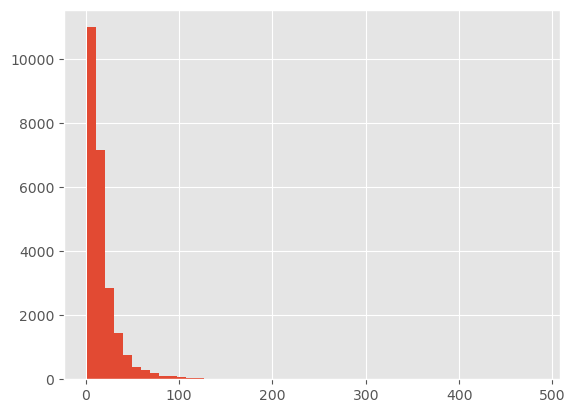

In [226]:

# train data
sentences, get_next = get_sentences(train_data)
maxlen = get_max_len(sentences)
print ('Maximum sequence length:', maxlen)
plt.style.use("ggplot")
# Check how long sentences are so that we can pad them
plt.style.use("ggplot")
plt.hist([len(s) for s in sentences], bins=50)
plt.xlabel("No. of Words")
plt.ylabel("count")
plt.show()

Maximum sequence length: 496


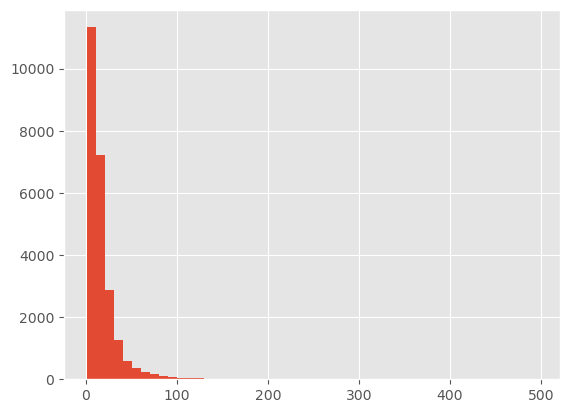

In [227]:
# test data
sentences, get_next = get_sentences(test_data)
maxlen = get_max_len(sentences)
print ('Maximum sequence length:', maxlen)
plt.style.use("ggplot")
# Check how long sentences are so that we can pad them
plt.style.use("ggplot")
plt.hist([len(s) for s in sentences], bins=50)
plt.show()

In [1]:
# valid data
sentences, get_next = get_sentences(valid_data)
maxlen = get_max_len(sentences)
print ('Maximum sequence length:', maxlen)
plt.style.use("ggplot")
# Check how long sentences are so that we can pad them
plt.style.use("ggplot")
plt.hist([len(s) for s in sentences], bins=50)
plt.xlabel("No. of Words")
plt.ylabel("count")
plt.show()

NameError: name 'get_sentences' is not defined

Maximum sequence length: 496


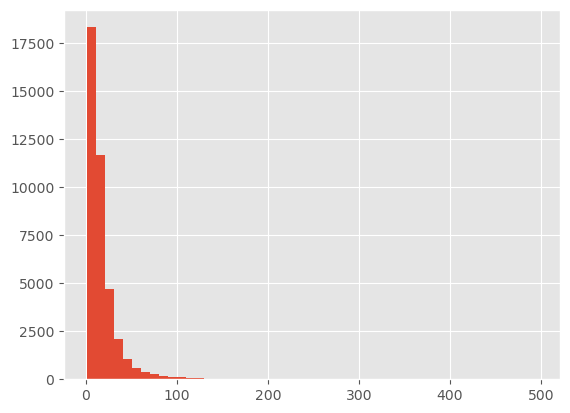

In [229]:
# valid data
sentences, get_next = get_sentences(train_final)
maxlen = get_max_len(sentences)
print ('Maximum sequence length:', maxlen)
plt.style.use("ggplot")
# Check how long sentences are so that we can pad them
plt.style.use("ggplot")
plt.hist([len(s) for s in sentences], bins=50)
plt.show()

Maximum sequence length: 484


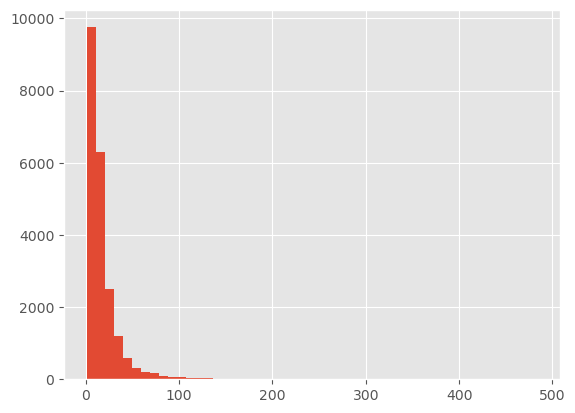

In [230]:
# valid data
sentences, get_next = get_sentences(test_final)
maxlen = get_max_len(sentences)
print ('Maximum sequence length:', maxlen)
plt.style.use("ggplot")
# Check how long sentences are so that we can pad them
plt.style.use("ggplot")
plt.hist([len(s) for s in sentences], bins=50)
plt.show()

Maximum sequence length: 496


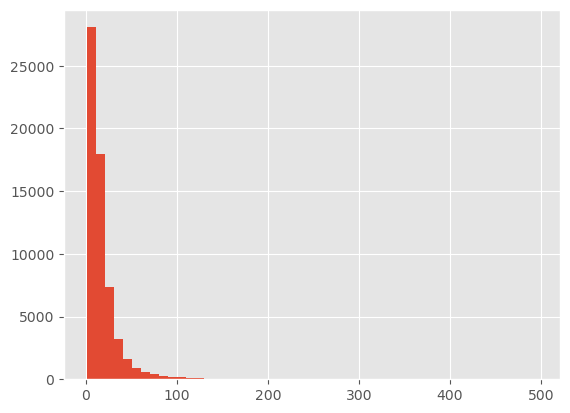

In [232]:
# valid data
sentences, get_next = get_sentences(full_data)
maxlen = get_max_len(sentences)
print ('Maximum sequence length:', maxlen)
plt.style.use("ggplot")
# Check how long sentences are so that we can pad them
plt.style.use("ggplot")
plt.hist([len(s) for s in sentences], bins=50)
plt.show()

TypeError: 'list' object is not callable

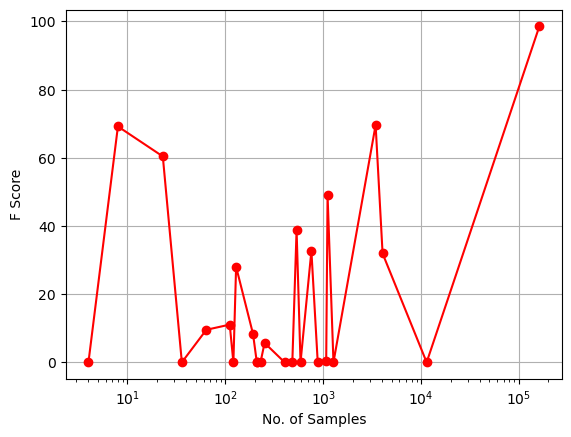

In [8]:
import matplotlib.pyplot as plt

lstm_f_scores = [0, 0, 0, 0, 0, 0, 0, 9.2, 0, 1.28, 0, 0, 0, 45.36, 3.59, 25.61, 25.74, 4.44, 16.4, 63.11, 72.67, 61.86, 43, 65.15, 76.81, 99.59]
spacy_f_scores = [100, 50, 0, 0, 44.78, 25.23, 35.86, 90.36, 53.15, 2.4, 59.21, 43.34, 0.03, 69.51, 54.05, 52.09, 69.05, 36.53, 0, 61.54, 73.01, 71.45, 48.64, 64.16, 78.01, 96.96]
bert_f_scores = [0, 69.19, 60.4, 0, 9.54, 11.06, 0, 28.03, 8.33, 0, 0, 0, 5.69, 0, 0, 38.82, 0, 32.67, 0, 0.51, 48.97, 0, 69.61, 31.93, 0, 98.56]
no_samples = [4, 8, 23, 36, 64, 111, 121, 129, 192, 210, 210, 229, 252, 404, 484, 535, 587, 758, 880, 1074, 1109, 1274, 3434, 4046, 11408, 161651]



plt.plot(no_samples, lstm_f_scores, marker='o', linestyle='-', color='blue', label='LSTM F')
plt.plot(no_samples, spacy_f_scores, marker='o', linestyle='-', color='green', label='spaCy F')
plt.plot(no_samples, bert_f_scores, marker='o', linestyle='-', color='red', label='BERT F')

plt.xlabel('No. of Samples')
plt.ylabel('F Score')
# plt.title('Performance Comparison of LSTM, spaCy, and BERT Models')
# plt.legend()
plt.grid(True)
# Add logarithmic scale to x-axis
plt.xscale('log')
plt.show()


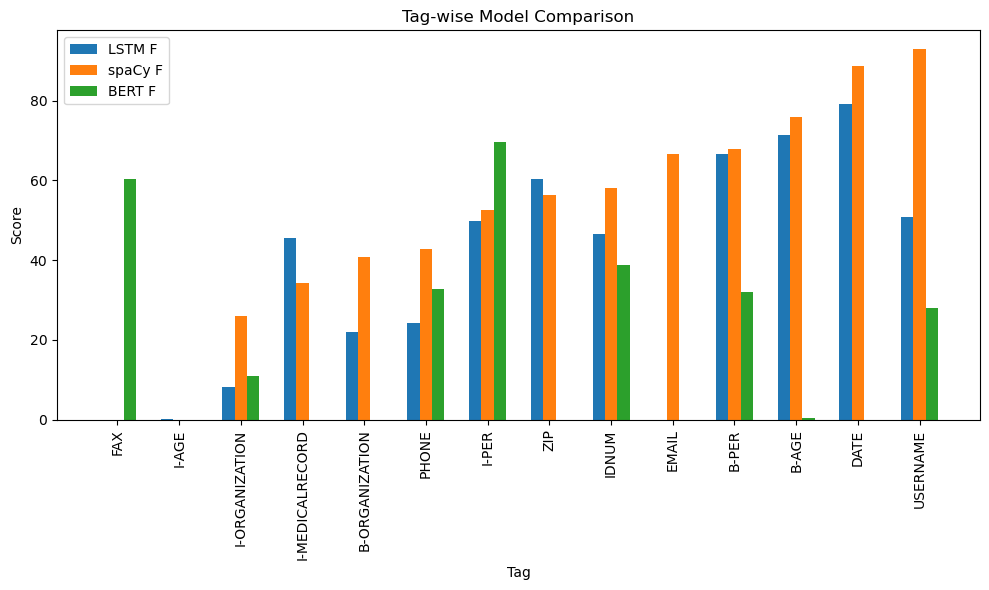

In [5]:
import matplotlib.pyplot as plt

# Data
tags = ['FAX', 'I-AGE', 'I-ORG', 'I-MEDI', 'B-ORG', 'PHONE', 'I-PER', 'ZIP', 'IDNUM', 'EMAIL', 'B-PER', 'B-AGE', 'DATE', 'USERNAME']
lstm_f = [0.03, 0.28, 8.12, 45.54, 21.88, 24.2, 49.86, 60.38, 46.5, 0.01, 66.52, 71.32, 79.13, 50.89]
spacy_f = [0, 0, 25.88, 34.36, 40.74, 42.72, 52.59, 56.27, 58.02, 66.67, 67.86, 75.94, 88.6, 92.94]
bert_f = [60.4, 0, 11.06, 0, 0, 32.67, 69.61, 0, 38.82, 0, 31.93, 0.51, 0, 28.03]

# Plotting
plt.figure(figsize=(10, 6))
x = range(len(tags))
width = 0.2

plt.bar(x, lstm_f, width, label='LSTM F')
plt.bar([val + width for val in x], spacy_f, width, label='spaCy F')
plt.bar([val + 2*width for val in x], bert_f, width, label='BERT F')

plt.xlabel('Tag')
plt.ylabel('Score')
plt.title('Tag-wise Model Comparison')

plt.xticks([val + width for val in x], tags, rotation=90)
plt.legend()

plt.tight_layout()
plt.show()
